# What is Interpolation?

Interpolation is the technique that approximates f(x) at all points of a sample vector (x and y)

## Importing libraries

To start our game, we have to import these libraries:

* Numpy, to help us with arrays
* Matplotlib, to show our results ia a beautiful graph

In [26]:
import numpy as np
import matplotlib.pyplot as plt

## The samples
The samples were written below:

In [27]:
x = np.array([-1,0,1])
y = np.array([0.54,1,0.54])

## Linear Interpolation

In [28]:
def linear(v):
    for i in range(1,x.shape[0]):
        if x[i] >= v:
            return y[i-1]+((y[i-1]-y[i])/(x[i-1]-x[i]))*(v-x[i-1])
    return 0

## Divided Difference

To solve using Newton, we have to develop the divided difference

In [29]:
def divided_difference(x,y):
    n = len(x)-1
    if n==0:
        return y[0]
    elif n==1:
        return (y[1]-y[0])/(x[1]-x[0])
    v1 = divided_difference(x[1:],y[1:])
    v2 = divided_difference(x[:n],y[:n])
    return (v1-v2)/(x[n]-x[0])

## Newton

This algorithm work to generate a polinomyal equation. It'll be defined below:

In [30]:
def newton(n_x):
    r,x_v,y_v = 0,[],[]
    for x_,y_ in zip(x,y):
        x_v.append(x_)
        y_v.append(y_)
        act = divided_difference(x_v,y_v)
        for j in x_v[:len(x_v)-1]:
            act *= (n_x-j)
        r+=act
    return r

## Lagrange

This is defined by:

In [31]:
def lagrange(z):
    r,n = 0,x.shape[0]
    for i in range(n):
        c,d = 1,1
        for j in range(n):
            if(i!=j):
                c *= (z-x[j])
                d *= (x[i]-x[j])
        r += y[i]*(c/d)
    return r

## Show the results

Utilizing Matplotlib we'll show the results graph

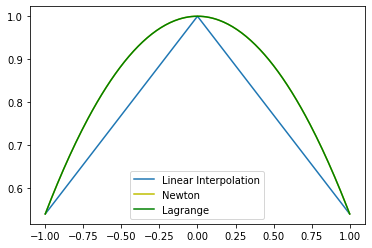

In [32]:
t1 = [i/100 for i in range(-100,101)]
plt.figure()
plt.plot(t1,[linear(i) for i in t1],label="Linear Interpolation")
plt.plot(t1,[newton(i) for i in t1],label="Newton",c="y")
plt.plot(t1,[lagrange(i) for i in t1],label="Lagrange",c='g')
plt.legend()